In [1]:
import numpy as np
import pandas as pd
n = 100000
ls = list()
for i in range(n):
    #ls.append((np.random.randint(1,7), np.random.randint(1,7)))
    ls.append(np.random.randint(1,7) + np.random.randint(1,7))
ls
df = pd.DataFrame({'res': ls})
pr = df.groupby('res')['res'].agg(count='size')
pr['count'] /= n
pr

,count
res,
2,0.02805
3,0.05434
4,0.08140
5,0.11189
6,0.13624
7,0.16618
8,0.14148
9,0.11215
10,0.08501


In [2]:
def comb(x,y):
    u = 1
    p = 1
    k = min(x-y, y)
    t = max(x-y, y)
    while(x > t):
        u *= x
        p *= k
        x -= 1
        k -= 1
    return u / p
def hyp(N, p, n):
    k = N * p
    ls = list()
    for i in range(n+1):
        ls.append((comb(N-k, n-i) * comb(k,i)) / comb(N,n))
    return pd.DataFrame({'probability': ls})
th = hyp(50000, 0.2, 10)
th#.sum()

,probability
0,1.073500e-01
1,2.684355e-01
2,3.020201e-01
3,2.013417e-01
4,8.807378e-02
5,2.641487e-02
6,5.500896e-03
7,7.854296e-04
8,7.358616e-05
9,4.084952e-06


In [3]:
it = np.random.choice(['ND', 'D'], p=[0.8, 0.2], size=(50000))
num = 100000
nod = list()
for i in range(num):
    ch = np.random.choice(50000, 10)
    fin = it[ch]
    nod.append(len(fin[fin == 'D']))
sim = pd.DataFrame({'defective': nod})
fr = sim.groupby('defective')['defective'].agg(frequency='size')
fr['experimental probability'] = fr['frequency'] / num
fr['theoretical probability'] = th.probability
fr['% difference in probability'] = round(abs(fr['experimental probability'] - fr['theoretical probability']) * 100 / np.where(fr['experimental probability'] >= fr['theoretical probability'], fr['experimental probability'], fr['theoretical probability']), 2)
fr

,frequency,experimental probability,theoretical probability,% difference in probability
defective,,,,
0,10735,0.10735,0.107350,0.00
1,27122,0.27122,0.268435,1.03
2,30320,0.30320,0.302020,0.39
3,19958,0.19958,0.201342,0.87
4,8665,0.08665,0.088074,1.62
5,2603,0.02603,0.026415,1.46
6,520,0.00520,0.005501,5.47
7,69,0.00069,0.000785,12.15
8,7,0.00007,0.000074,4.87


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>


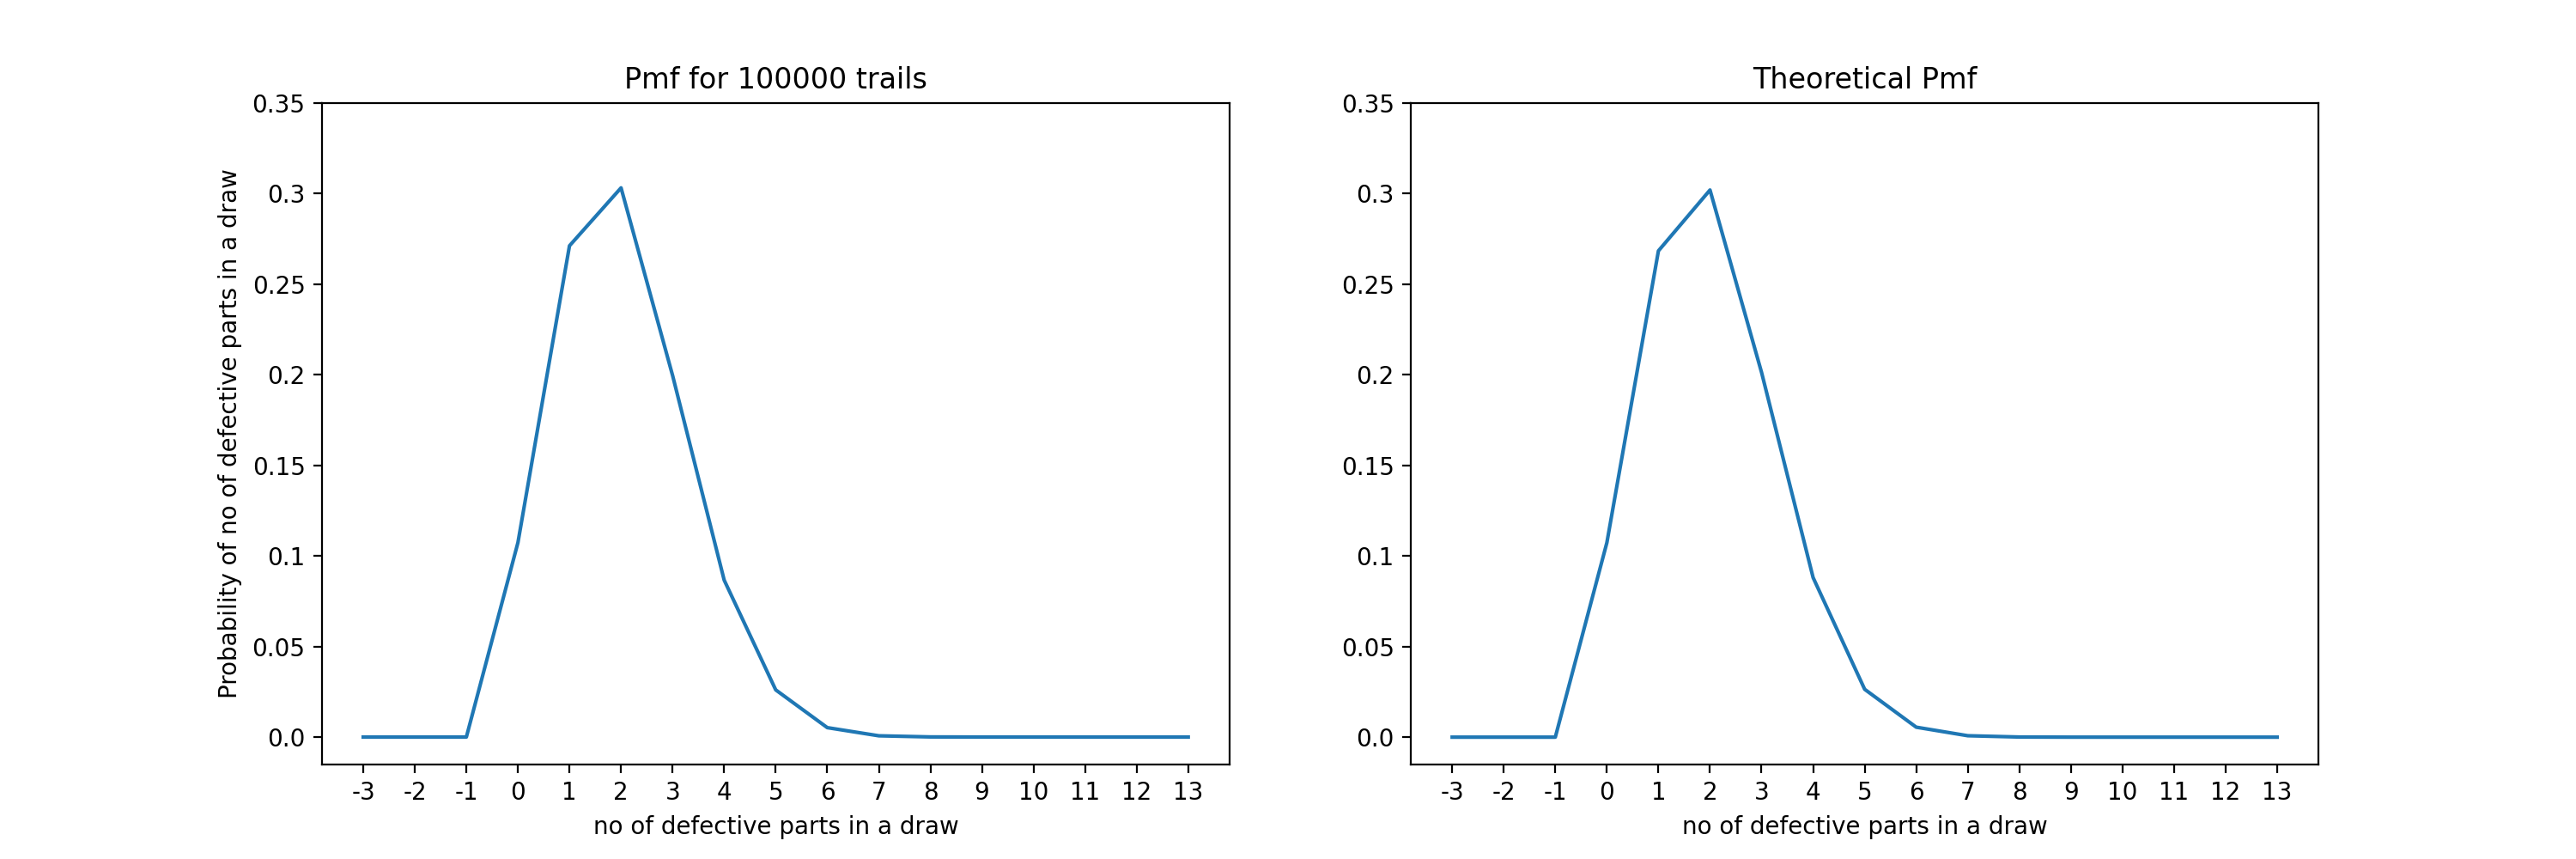

([<matplotlib.axis.YTick at 0x7f8dea8a0c90>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.35, '0.35')])

In [5]:
x1 = [-3, -2, -1]
x2 = [11, 12, 13]
y = [0]*3

plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.plot(x1+list(fr.index)+x2, y+list(fr['experimental probability'])+y)#, width=1)
ax1.title.set_text('Pmf for 100000 trails')
plt.xlabel('no of defective parts in a draw')
plt.ylabel('Probability of no of defective parts in a draw')
plt.xticks([-1, -2, -3]+[x for x in range(14)], [-1, -2, -3]+[x for x in range(14)])
plt.yticks([round(x*0.05, 2) for x in range(8)], [round(x*0.05, 2) for x in range(8)])
ax2 = plt.subplot(122)
ax2.plot(x1+list(th.index)+x2, y+list(th.probability)+y)#, width=1)
ax2.title.set_text('Theoretical Pmf')
plt.xticks([-1, -2, -3]+[x for x in range(14)], [-1, -2, -3]+[x for x in range(14)])
plt.xlabel('no of defective parts in a draw')
plt.yticks([round(x*0.05, 2) for x in range(8)], [round(x*0.05, 2) for x in range(8)])


In [6]:
it = np.random.choice(['ND', 'D'], p=[0.8, 0.2], size=(50000))
num = 10000
nod = list()
for i in range(num):
    ch = np.random.choice(50000, 10)
    fin = it[ch]
    nod.append(len(fin[fin == 'D']))
sim = pd.DataFrame({'defective': nod})
fr = sim.groupby('defective')['defective'].agg(frequency='size')
fr['experimental probability'] = fr['frequency'] / num
fr['theoretical probability'] = th.probability
fr['% difference in probability'] = round(abs(fr['experimental probability'] - fr['theoretical probability']) * 100 / np.where(fr['experimental probability'] >= fr['theoretical probability'], fr['experimental probability'], fr['theoretical probability']), 2)
fr

,frequency,experimental probability,theoretical probability,% difference in probability
defective,,,,
0,1088,0.1088,0.107350,1.33
1,2734,0.2734,0.268435,1.82
2,2988,0.2988,0.302020,1.07
3,1977,0.1977,0.201342,1.81
4,870,0.0870,0.088074,1.22
5,271,0.0271,0.026415,2.53
6,66,0.0066,0.005501,16.65
7,5,0.0005,0.000785,36.34
8,1,0.0001,0.000074,26.41
